# Code Alongs- MLP - Multilayered perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data

# from tensorflows documentation 
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

2024-05-11 16:01:04.553312: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train.shape

(60000, 28, 28)

7

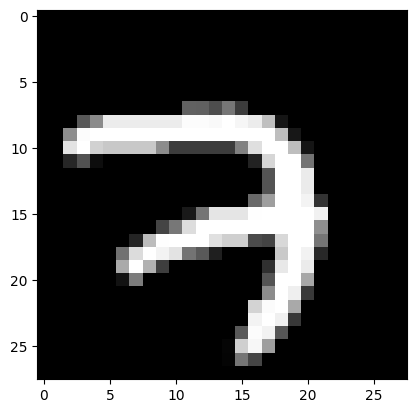

In [11]:
plt.imshow(x_train[5000], cmap="gray")
y_train[5000]

In [12]:
# 2D image for index 5000 - it contains 28x28 
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
x_train[5000].shape

(28, 28)

In [14]:
# pixel intensity between 0 and 254 for this image
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [15]:
# pixel value at row 10, col 5 for image 5000
x_train[5000,10,5]

199

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

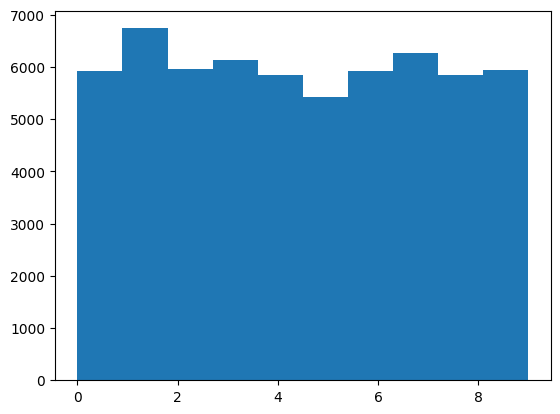

In [10]:
plt.hist(y_train)

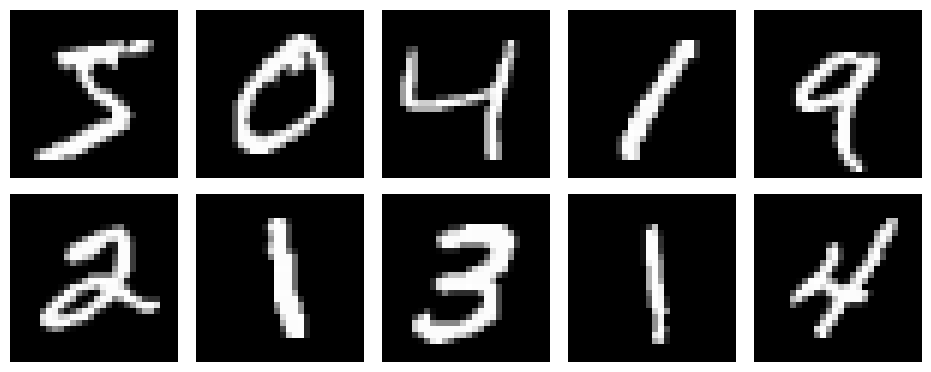

In [22]:
def display_images(data, n_rows = 2, n_cols = 5, figsize=(12,4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)

display_images(x_train)

(10, 28, 28)

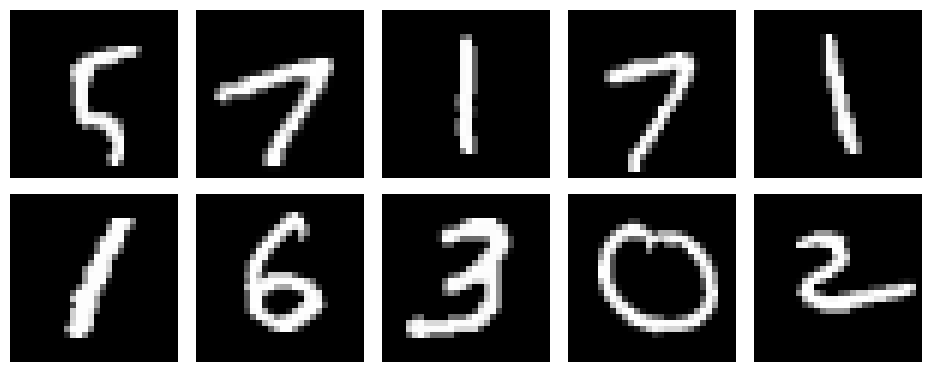

In [26]:
display_images(x_train[100:110])
x_train[100:110].shape

# Normalize data

In [27]:
X_train = x_train.astype("float32")/255
X_test = x_test.astype("float32")/255

X_train.min(), X_train.max()

(0.0, 1.0)

In [14]:
X_train[5000].reshape(-1).shape

(784,)

In [28]:
X_train[5000].shape

(28, 28)

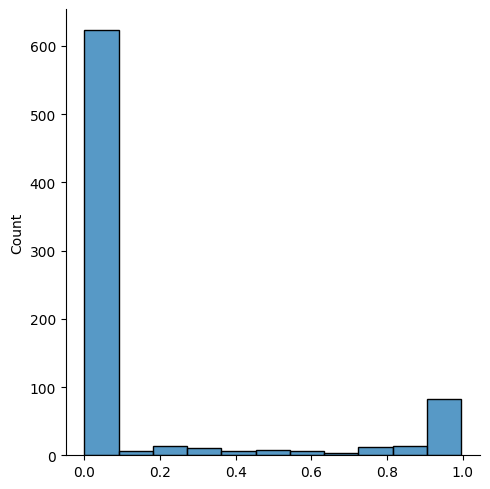

In [15]:
import seaborn as sns 

sns.displot(data = X_train[5000].reshape(-1), kind="hist")

# MLP Model 

- 10 output neurons/nodes (which represents 0,1,2,3,...,9, our classes)
- softmax activation function in output layer -> probabilities
- 784 neurons for input layer (28x28) -> use Flatten layer
- hidden layers -> Dense

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


def mlp_model(
    neurons: tuple | list = None,
    names: tuple | list = None,
    activations: tuple | list = [],
):
    model = Sequential(name="MLP_model")
    model.add(Flatten(input_shape=(28, 28), name="Input_layer"))

    # hidden layers + output
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name=name, activation=activation))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

    return model

# naive because we don't have any hidden layers
model_naive = mlp_model(neurons=[10], names=["Output_layer"], activations=["softmax"])
model_naive.summary()

/Users/user/Projects/AI-Muhsin-Ahmad-OPA23/venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_naive.fit(X_train, y_train, validation_split=1 / 6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7981 - loss: 0.7772 - val_accuracy: 0.9164 - val_loss: 0.3088
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9082 - loss: 0.3291 - val_accuracy: 0.9230 - val_loss: 0.2792
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9183 - loss: 0.2916 - val_accuracy: 0.9262 - val_loss: 0.2669
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9218 - loss: 0.2783 - val_accuracy: 0.9278 - val_loss: 0.2629
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9238 - loss: 0.2707 - val_accuracy: 0.9303 - val_loss: 0.2588
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9239 - loss: 0.2713 - val_accuracy: 0.9289 - val_loss: 0.2575
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9262 - loss: 0.2632 - val_accuracy: 0.9299 - val_loss: 0.2563
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9284 - loss: 0.2552 - 

In [31]:
import pandas as pd 

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.87058,0.502316,0.9164,0.308828
1,0.91156,0.316490,0.9230,0.279177
2,0.91808,0.292795,0.9262,0.266928
3,0.92046,0.281221,0.9278,0.262903
4,0.92336,0.273636,0.9303,0.258830


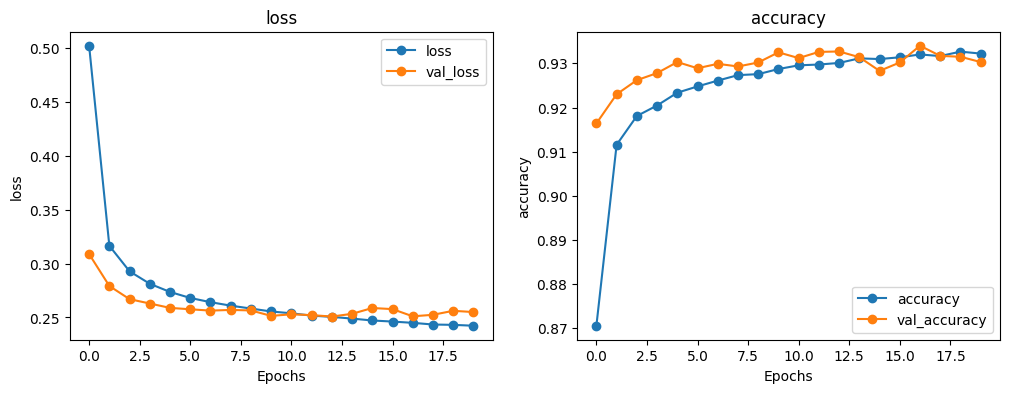

In [38]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(
            y=metric,
            xlabel="Epochs",
            ylabel=metric[0],
            title=metric[0],
            ax=ax,
            style=style,
        )


plot_metrics(naive_history)

# Add hidden layers

In [37]:
model_deep = mlp_model(
    neurons=[128,128,10], 
    activations=["relu" , "relu", "softmax"],
    names = ["hidden_1", "Hidden_2", "Output"]
)
model_deep.summary()

/Users/user/Projects/AI-Muhsin-Ahmad-OPA23/venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model_deep.fit(X_train, y_train, validation_split=1 / 6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8697 - loss: 0.4477 - val_accuracy: 0.9676 - val_loss: 0.1191
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9675 - loss: 0.1053 - val_accuracy: 0.9701 - val_loss: 0.0992
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9767 - loss: 0.0734 - val_accuracy: 0.9727 - val_loss: 0.0974
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.0543 - val_accuracy: 0.9721 - val_loss: 0.0982
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9870 - loss: 0.0392 - val_accuracy: 0.9731 - val_loss: 0.1002
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9905 - loss: 0.0288 - val_accuracy: 0.9756 - val_loss: 0.0936
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0311 - val_accuracy: 0.9752 - val_loss: 0.1091
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9925 - loss: 0.0223 - 

In [40]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92590,0.250437,0.9676,0.119053
1,0.96808,0.103761,0.9701,0.099235
2,0.97714,0.073095,0.9727,0.097405
3,0.98174,0.056198,0.9721,0.098229
4,0.98580,0.042737,0.9731,0.100215


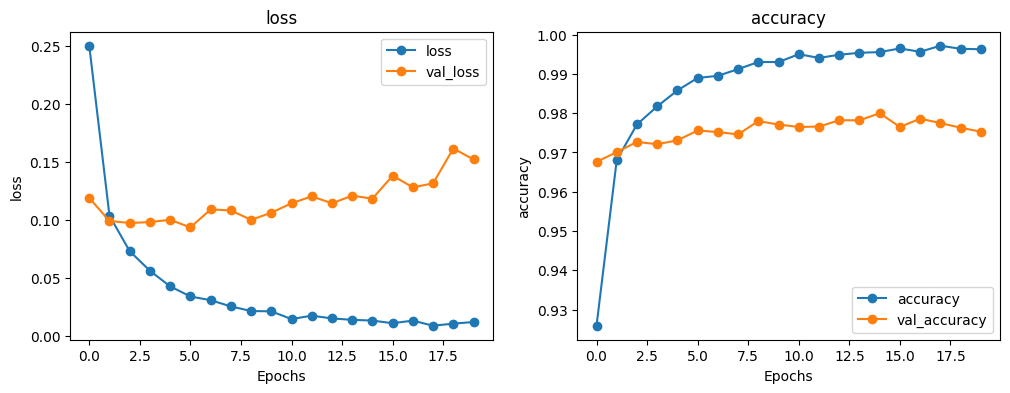

In [41]:
plot_metrics(deep_history)

In [42]:
# trains on all training data (60000)
model_deep.fit(X_train,y_train, epochs= 3 , verbose =1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9913 - loss: 0.0372
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9967 - loss: 0.0125
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9960 - loss: 0.0115


# Prediction and evaluation

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_deep.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.2398550e-16, 1.0444314e-14, 5.4720490e-12, ..., 9.9999994e-01,
        3.8846237e-13, 1.1041317e-09],
       [3.3170819e-22, 2.1323813e-13, 9.9999994e-01, ..., 5.6879569e-20,
        2.0197508e-19, 5.4236587e-27],
       [8.9720051e-11, 9.9999815e-01, 8.1209830e-09, ..., 4.0334136e-08,
        1.3244782e-07, 5.2836299e-12],
       ...,
       [1.6859456e-24, 4.6270337e-18, 1.4679663e-20, ..., 5.8210789e-12,
        1.8097251e-13, 6.9719341e-11],
       [2.4216101e-17, 6.0811251e-25, 1.6517781e-18, ..., 1.1819381e-16,
        3.6778917e-11, 3.6569195e-19],
       [3.6254899e-17, 3.5743326e-27, 1.3883302e-23, ..., 1.1690035e-28,
        7.4707843e-18, 1.9281823e-23]], dtype=float32)

In [44]:
y_pred[1]

array([3.3170819e-22, 2.1323813e-13, 9.9999994e-01, 1.5146188e-17,
       1.7751890e-28, 2.3369819e-25, 1.7326928e-19, 5.6879569e-20,
       2.0197508e-19, 5.4236587e-27], dtype=float32)

In [27]:
y_test[1]

2

In [45]:
y_pred.shape

(10000, 10)

In [46]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



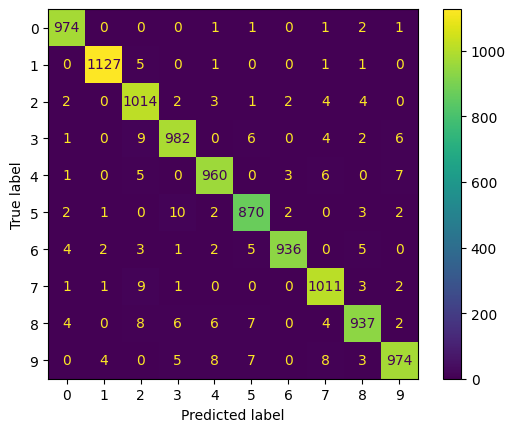

In [48]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Some misclassifications

In [49]:
(y_pred != y_test).sum()

215

In [50]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_indices[:10]

array([104, 115, 149, 217, 247, 320, 321, 340, 445, 447])

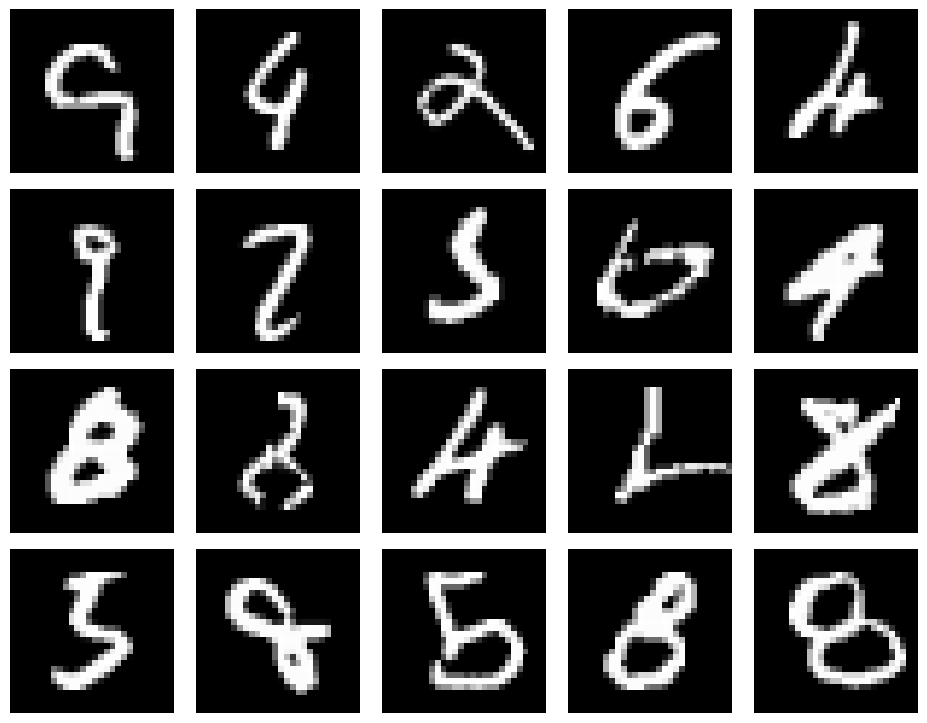

In [51]:
display_images(X_test[misclassified_indices], 4, 5, (12, 8))